Figure from evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
songs = [f"song{i}" for i in range(1,6)]
rates = [f"best{i}" for i in range(1,6)]
colnames = [" "]
for i,j in zip(songs, rates):
    colnames.append(i)
    colnames.append(j)
colnames.append("comments")

In [3]:
df = pd.read_csv("stat_raw.csv", sep=",", names = colnames, skiprows=1)
df = df[df.columns[1:-1]]
df

,song1,best1,song2,best2,song3,best3,song4,best4,song5,best5
0,Transfer Americana 1: https://gregwinther.gith...,2,Americana 1: https://gregwinther.github.io/fol...,4,Americana 1: https://gregwinther.github.io/fol...,2,Transfer Americana 1: https://gregwinther.gith...,3,Americana 1: https://gregwinther.github.io/fol...,2
1,Transfer Americana 1: https://gregwinther.gith...,4,Americana 1: https://gregwinther.github.io/fol...,3,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,2,Americana 1: https://gregwinther.github.io/fol...,1
2,Americana 1: https://gregwinther.github.io/fol...,1,Americana 1: https://gregwinther.github.io/fol...,1,Transfer Americana 1: https://gregwinther.gith...,2,Americana 1: https://gregwinther.github.io/fol...,1,Americana 1: https://gregwinther.github.io/fol...,1
3,Transfer Americana 1: https://gregwinther.gith...,5,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,5,Transfer Americana 1: https://gregwinther.gith...,3,Americana 1: https://gregwinther.github.io/fol...,2
4,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,3
5,Americana 1: https://gregwinther.github.io/fol...,2,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,2,Americana 1: https://gregwinther.github.io/fol...,2,Transfer Americana 1: https://gregwinther.gith...,2
6,Americana 1: https://gregwinther.github.io/fol...,3,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,3,Americana 1: https://gregwinther.github.io/fol...,3
7,Americana 1: https://gregwinther.github.io/fol...,3,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,2
8,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,2
9,Transfer Americana 1: https://gregwinther.gith...,3,Americana 1: https://gregwinther.github.io/fol...,3,Transfer Americana 1: https://gregwinther.gith...,2,Transfer Americana 1: https://gregwinther.gith...,3,Transfer Americana 1: https://gregwinther.gith...,3


Reduce and clean data

In [4]:
for col in songs:
    df[col] = df[col].apply(lambda val: val[0])

In [5]:
df

,song1,best1,song2,best2,song3,best3,song4,best4,song5,best5
0,T,2,A,4,A,2,T,3,A,2
1,T,4,A,3,T,3,T,2,A,1
2,A,1,A,1,T,2,A,1,A,1
3,T,5,T,2,T,5,T,3,A,2
4,T,2,T,3,T,3,T,2,T,3
5,A,2,T,3,T,2,A,2,T,2
6,A,3,T,3,T,3,T,3,A,3
7,A,3,T,2,T,2,T,2,T,2
8,T,2,T,3,T,3,T,2,T,2
9,T,3,A,3,T,2,T,3,T,3


In [14]:
avg_rating = round(df.mean(),1)
avg_rating

best1    2.8
best2    2.8
best3    2.7
best4    2.5
best5    2.1
dtype: float64

In [15]:
avg_rating.mean()

2.58

## The barplot

In [16]:
df_songs = pd.melt(df,value_vars=songs, var_name="songs", value_name="category")
df_songs.head()

,songs,category
0,song1,T
1,song1,T
2,song1,A
3,song1,T
4,song1,T


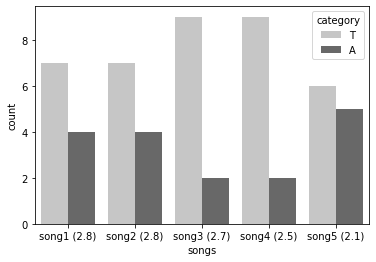

In [38]:
g = sns.countplot(x="songs",data=df_songs, hue="category", palette=("Greys"))
xlabels = [f"{song} ({best})" for song,best in zip(songs,avg_rating)]
g.set_xticklabels(xlabels)
plt.savefig("images/songs_category.png")
None

In [39]:
frac = df_songs["category"].value_counts()
print("Fraction of choice Transfer vs Americana: ",frac[0]/frac.sum())

Fraction of choice Transfer vs Americana:  0.6909090909090909


## The boxplot

In [35]:
df_rates = pd.melt(df,value_vars=rates, var_name="rates", value_name="score")
df_rates.head()

,rates,score
0,best1,2
1,best1,4
2,best1,1
3,best1,5
4,best1,2


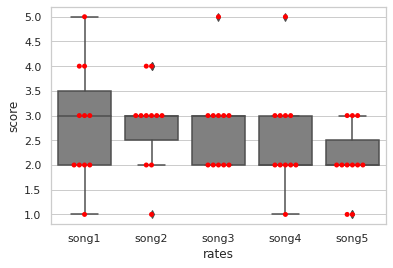

In [53]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(x = "rates", y = "score", data=df_rates, color="Grey")
sns.swarmplot(x = "rates", y = "score", data=df_rates, color="red")
g.set_xticklabels(songs)
plt.savefig("images/scores.png")
None